    Loan_ID  Gender Married Dependents     Education Self_Employed  \
0  LP002684  Female      No          0  Not Graduate            No   
1  LP001907    Male     Yes          0      Graduate            No   
2  LP001205    Male     Yes          0      Graduate            No   
3  LP001275    Male     Yes          1      Graduate            No   
4  LP002455    Male     Yes          2      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3400                  0          95               360   
1            14583                  0         436               360   
2             2500               3796         120               360   
3             3988                  0          50               240   
4             3859                  0          96               360   

   Credit_History Property_Area  
0               1         Rural  
1               1     Semiurban  
2               1         Urban  
3               

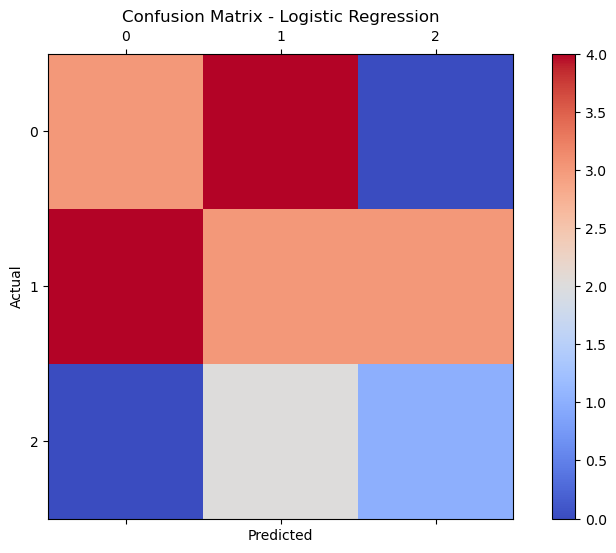

Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.33      0.30      0.32        10
           2       0.25      0.33      0.29         3

    accuracy                           0.35        20
   macro avg       0.34      0.35      0.34        20
weighted avg       0.35      0.35      0.35        20



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = r'C:\Users\Anjali Shetty\Downloads\X_test.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Handling missing values (if any)
data = data.dropna()

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Ensure all columns are numeric
print(X.dtypes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
plt.matshow(conf_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)
